Available columns: Index(['message_length', 'response_time', 'case_type'], dtype='object')
=== Classification Report ===
              precision    recall  f1-score   support

     billing       0.75      0.27      0.40        11
     general       0.33      0.80      0.47         5
   technical       0.50      0.50      0.50         4

    accuracy                           0.45        20
   macro avg       0.53      0.52      0.46        20
weighted avg       0.60      0.45      0.44        20

Accuracy: 0.45
Precision: 0.60
Recall: 0.45


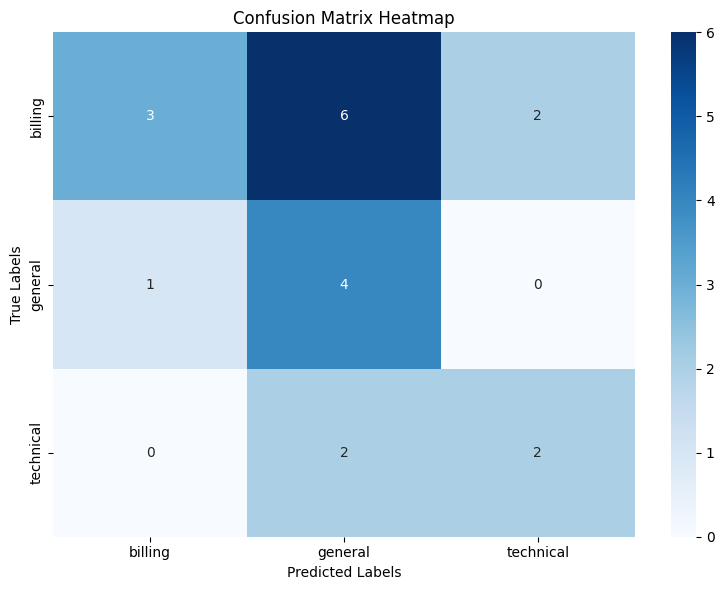

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

# Load CSV
df = pd.read_csv('/content/support_cases.csv')

# Check columns
print("Available columns:", df.columns)

# Drop missing values
df.dropna(subset=['message_length', 'response_time', 'case_type'], inplace=True)

# Encode the labels
df['case_type'] = df['case_type'].astype('category')
df['label_encoded'] = df['case_type'].cat.codes

# Features and labels
X = df[['message_length', 'response_time']]
y = df['label_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

# Print results
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=df['case_type'].cat.categories))
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = df['case_type'].cat.categories

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()
